In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [243]:
data=pd.read_csv("C:/Users/97455/Downloads/Spark projects/Global Terrorism - START data/globalterrorismdb_0718dist.csv")

C:\Users\97455\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [244]:
df.head()

,Year,Month,Day,Country,Region,State,City,Summary,Suicide/Not,Type_of_Attack,Group_behind,Target,Weapon_used,People_Killed,Wounded,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0,Assassination,MANO-D,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0,Hostage Taking (Kidnapping),23rd of September Communist League,Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0,Assassination,Unknown,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,0,Bombing/Explosion,Unknown,Government (Diplomatic),Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,0,Facility/Infrastructure Attack,Unknown,Government (Diplomatic),Incendiary,0.0,0.0,0.0


In [245]:
df.columns.values

array(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Summary', 'Suicide/Not', 'Type_of_Attack', 'Group_behind',
       'Target', 'Weapon_used', 'People_Killed', 'Wounded', 'Casualities'],
      dtype=object)

In [246]:
df=df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','summary':'Summary','suicide':'Suicide/Not','attacktype1_txt':'Type_of_Attack','gname':'Group_behind','targtype1_txt':'Target',
           'weaptype1_txt':'Weapon_used','nkill':'People_Killed','nwound':'Wounded'})

In [247]:
df=df[['Year','Month','Day','Country','Region','State','City','Summary','Suicide/Not','Type_of_Attack','Group_behind','Target',
         'Weapon_used','People_Killed','Wounded']]

In [248]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Summary           66129
Suicide/Not           0
Type_of_Attack        0
Group_behind          0
Target                0
Weapon_used           0
People_Killed         0
Wounded               0
dtype: int64

In [249]:
df['Wounded']=df['Wounded'].fillna(0)
df['People_Killed']=df['People_Killed'].fillna(0)

In [250]:
df['Casualities']=df['Wounded']+df['People_Killed']

In [251]:
df.head()

,Year,Month,Day,Country,Region,State,City,Summary,Suicide/Not,Type_of_Attack,Group_behind,Target,Weapon_used,People_Killed,Wounded,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0,Assassination,MANO-D,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0,Hostage Taking (Kidnapping),23rd of September Communist League,Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0,Assassination,Unknown,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,0,Bombing/Explosion,Unknown,Government (Diplomatic),Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,0,Facility/Infrastructure Attack,Unknown,Government (Diplomatic),Incendiary,0.0,0.0,0.0


# Attacks Over Years

In [224]:
# Ploting No:of Attacks Vs Years

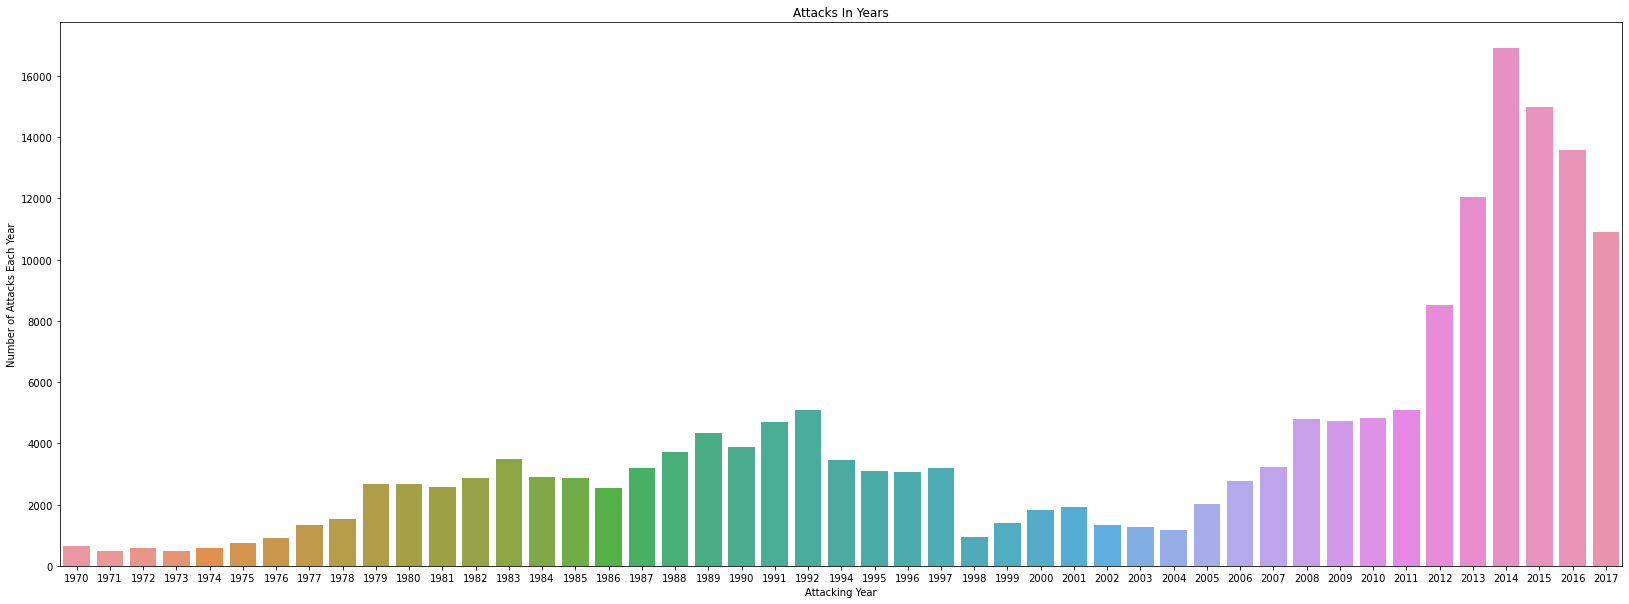

In [252]:
year = df['Year'].unique()
no_of_attacks = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (28,10))
sns.barplot(x = year,
           y = no_of_attacks)
plt.xlabel('Attacking Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attacks In Years')
plt.show()

 From the graph it is clear that the most attacks during the year 2014

# No:of casualities in each year

In [253]:
casualities = df.groupby('Year').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
casualities

,Year,Casualities
43,2014,85618.0
44,2015,82896.0
45,2016,74872.0
42,2013,59961.0
46,2017,51372.0
41,2012,40942.0
36,2007,35348.0
30,2001,30503.0
38,2009,28411.0
37,2008,28155.0


<AxesSubplot:xlabel='Year', ylabel='Casualities'>

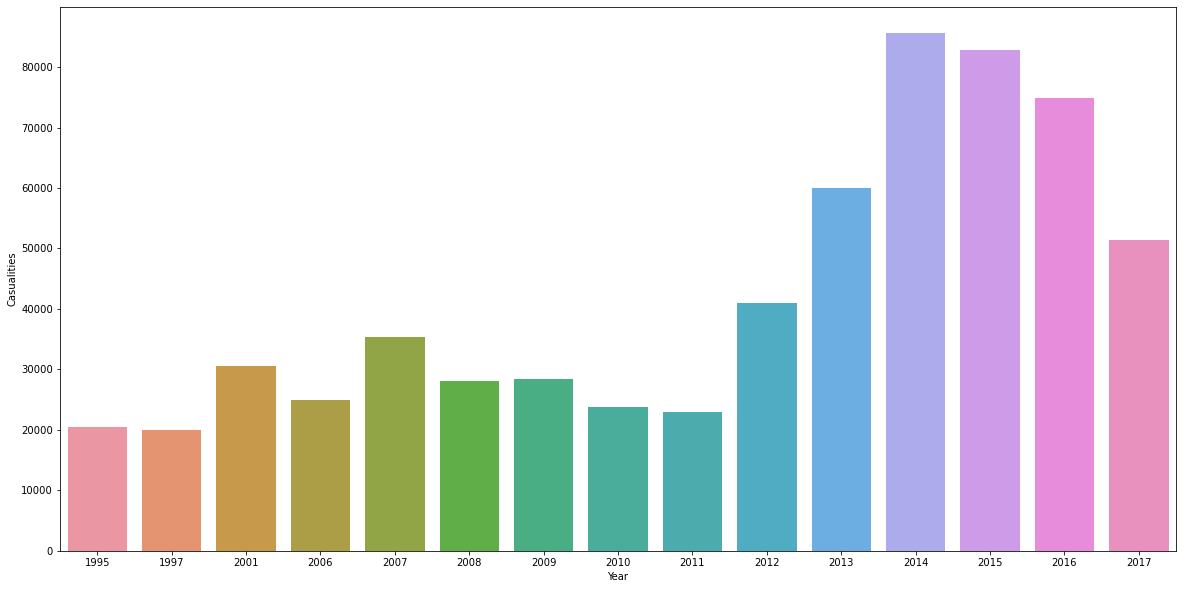

In [254]:
plt.figure(figsize=(20,10))
sns.barplot(x=casualities.Year,y=casualities.Casualities)

# Countries Affected

C:\Users\97455\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


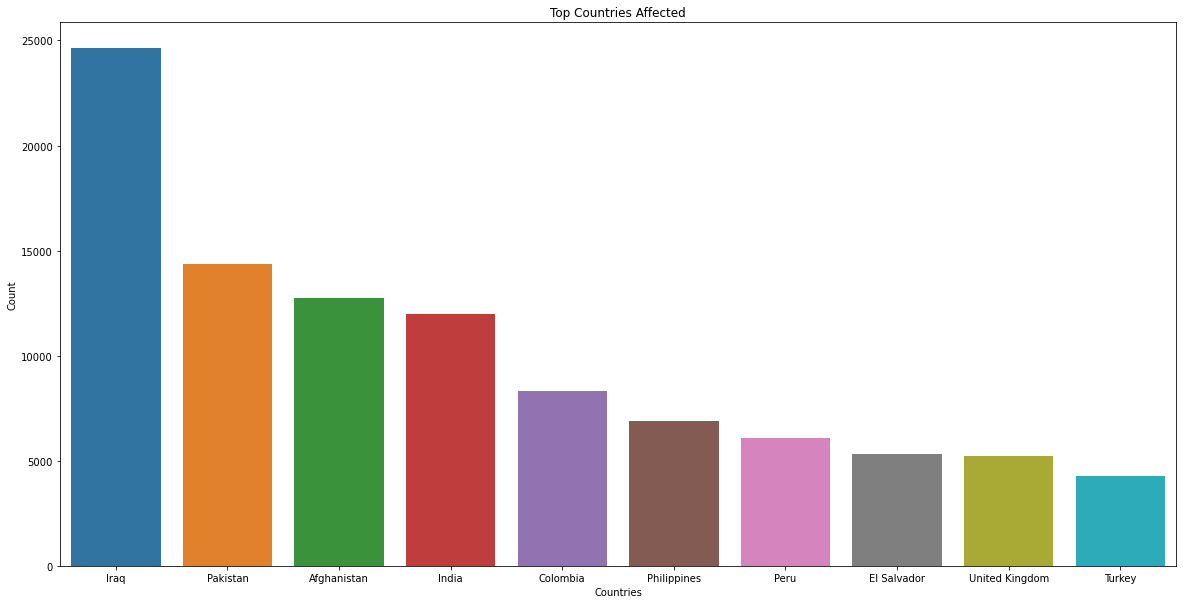

In [255]:
plt.figure(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

Country with most number of attacks

In [229]:
# Country which received most no:of attacks was Iraq

# Country with most no:of casualities

In [256]:
casualities = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
casualities

,Country,Casualities
84,Iraq,213279.0
0,Afghanistan,83661.0
134,Pakistan,65860.0
80,India,48321.0
130,Nigeria,32921.0
167,Sri Lanka,31091.0
175,Syria,29338.0
35,Colombia,25026.0
189,United States,24473.0
140,Philippines,22926.0


<AxesSubplot:xlabel='Country', ylabel='Casualities'>

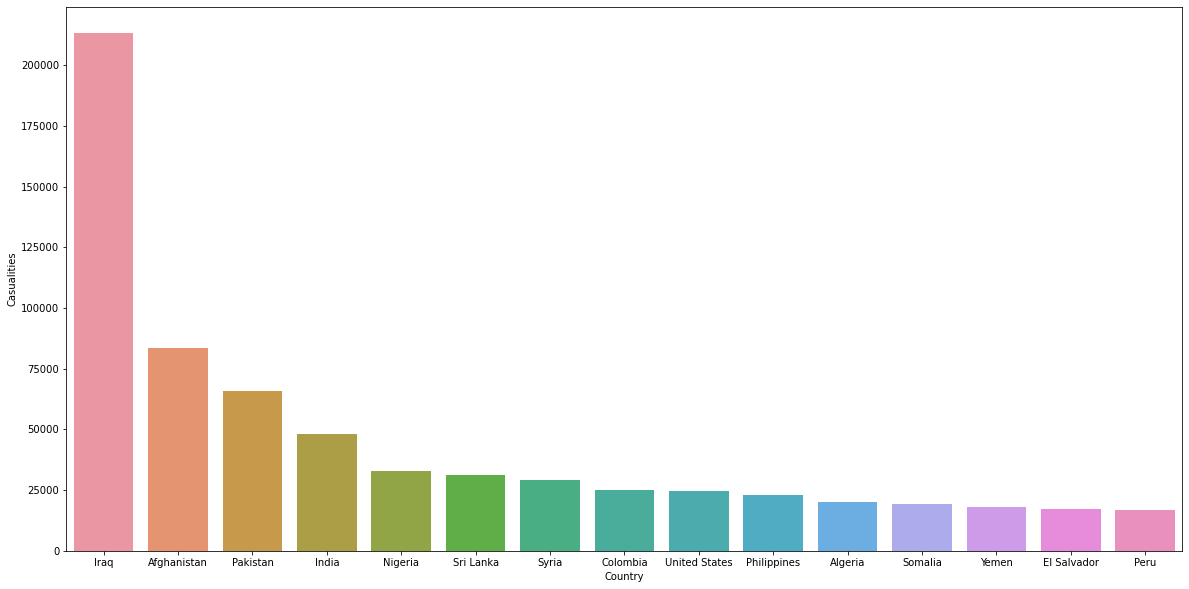

In [257]:
plt.figure(figsize=(20,10))
sns.barplot(x=casualities.Country,y=casualities.Casualities)

In [232]:
# No:of casualities in Iraq:213279.0

# Region with most no:of attacks

C:\Users\97455\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


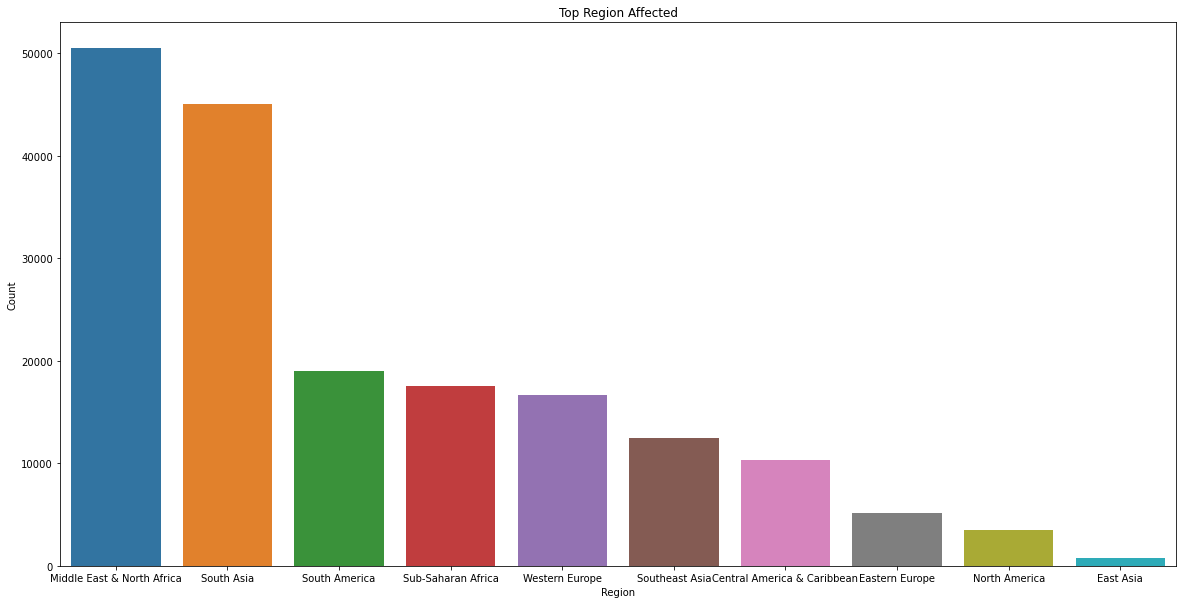

In [258]:
plt.figure(figsize=(20,10))
sns.barplot(df['Region'].value_counts()[:10].index,df['Region'].value_counts()[:10].values)
plt.title('Top Region Affected')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [234]:
# Middle East& North Africa are the Regions with most no:of attacks

# No:of Casualities in each region

In [259]:
casualities = df.groupby('Region').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
casualities

,Region,Casualities
5,Middle East & North Africa,351950.0
8,South Asia,242679.0
10,Sub-Saharan Africa,131243.0
7,South America,45553.0
9,Southeast Asia,41896.0
1,Central America & Caribbean,37699.0
6,North America,26447.0
11,Western Europe,25026.0
4,Eastern Europe,19460.0
3,East Asia,10365.0


In [260]:
df.head()

,Year,Month,Day,Country,Region,State,City,Summary,Suicide/Not,Type_of_Attack,Group_behind,Target,Weapon_used,People_Killed,Wounded,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0,Assassination,MANO-D,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0,Hostage Taking (Kidnapping),23rd of September Communist League,Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0,Assassination,Unknown,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,0,Bombing/Explosion,Unknown,Government (Diplomatic),Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,0,Facility/Infrastructure Attack,Unknown,Government (Diplomatic),Incendiary,0.0,0.0,0.0


# Most type of Attack happened

In [261]:
df['Type_of_Attack'].value_counts()


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Type_of_Attack, dtype: int64

In [238]:
# Bombing/Explosion was the type of attack that happened mostly

# Group which attacked the most

In [263]:
df['Group_behind'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Worker's Brigade                                        1
Arab Revenge Organization                               1
Supporters of Johnny Paul Koroma                        1
Barq al-Nasser Brigade                                  1
Armed Anti-Imperialist Movement                         1
Name: Group_behind, Length: 3537, dtype: int64

<AxesSubplot:>

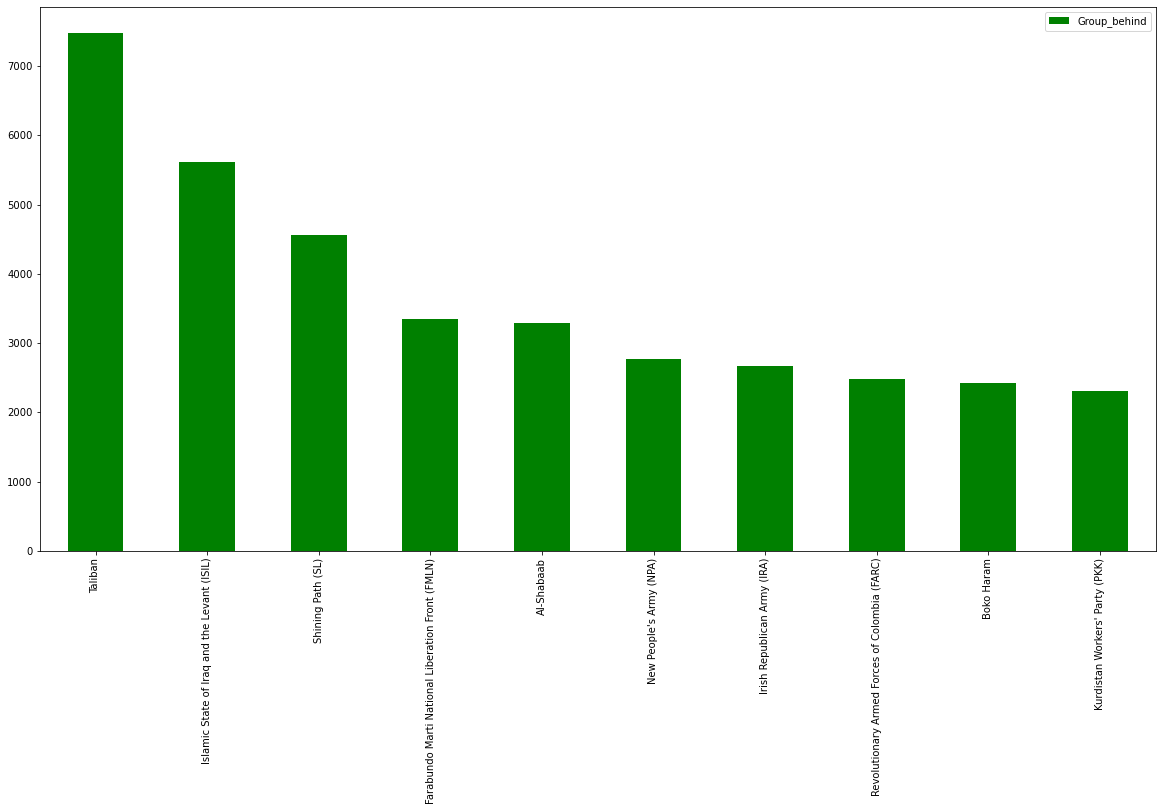

In [264]:
df['Group_behind'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))

In [241]:
# Above graph states that most no:of attacks were held by Taliban